In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Data:

    def __init__(self, dataset, prefix=''):
        self.dataset = dataset
        self.prefix = prefix
        self.ylabel = 'F1' if dataset=='MRPC' else 'Acc.'

        raw_data = np.load(f"saved_data/{self.dataset}/{prefix}-multi-stage.npy", allow_pickle=True).item()
        self.thresholds = list(raw_data.keys())
        self.thresholds.sort()
        self.macs_g = [raw_data[x]['macs(G)'] for x in self.thresholds]
        self.acc = [raw_data[x]['result'] for x in self.thresholds]

In [3]:
def plot_func(axis, data):    
    if data.prefix == 'raw':
        label = 'SR'
        linestyle = '.-'
    elif data.prefix == 'reg-hist':
        label = 'SR-hist.'
        linestyle = '+-'
    elif data.prefix == 'random-raw':
        label = 'Random'
        linestyle = '.--'
    
    flops = [2*x for x in data.macs_g]  # double macs to obtain flops
    axis.plot(flops, data.acc, linestyle, label=label)
    
    
def save_fig(fname):
    os.makedirs(os.path.dirname(fname), exist_ok=True)
    plt.savefig(fname)

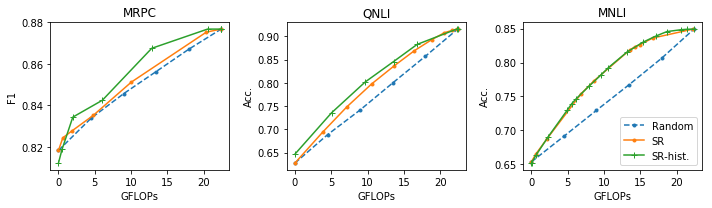

In [4]:
datasets = ['MRPC', 'QNLI', 'MNLI']
fig, axes = plt.subplots(1, len(datasets), figsize=[10,3])
for i, ds in enumerate(datasets):
    for pre in ['random-raw', 'raw', 'reg-hist']:
        data = Data(ds, pre)
        plot_func(axes[i], data)
    axes[i].set_title(data.dataset)
    axes[i].set_xlabel('GFLOPs')
    axes[i].set_ylabel(data.ylabel)
    if i==2:
        axes[i].legend(loc='lower right')

plt.tight_layout()
save_fig('figs/cascade.pdf')